In [1]:
### Imports
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import re
import math


In [2]:
# Load data
df = pd.read_csv('FED_DATA/FedMeetingHistory_20240312.csv')  
new_header = df.iloc[0]

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df = df.set_index('Date')
df

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1450-1475),(1475-1500),(1500-1525),(1525-1550),(1550-1575),(1575-1600),(1600-1625),(1625-1650),(1650-1675),NaN
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,0,0,0,0,0,0,0,0,0,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,0,0,0,0,0,0,0,0,0,0.0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
3/7/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [3]:

# header_vals = []
# for i in new_header:
#     header_vals.append(i)

# def parse_numbers(string):
#     match = re.match(r'\((\d+)-(\d+)\)', string)
#     if match:
#         return tuple(map(int, match.groups()))
#     else:
#         return string
    
# parsed_header_vals = [parse_numbers(val) for val in header_vals]
# df.columns = parsed_header_vals
# df

In [4]:
df_mar20_2024 = df.iloc[:, :64]
df_may1_2024 = df.iloc[:, 64:129]
df_jun12_2024 = df.iloc[:, 129:195]
df_jul31_2024 = df.iloc[:, 195:257]
df_sep18_2024 = df.iloc[:, 257:324]
df_nov17_2024 = df.iloc[:, 324:386]
df_dec18_2024 = df.iloc[:, 386:448]
df_jan29_2025 = df.iloc[:, 448:515]
df_mar19_2025 = df.iloc[:, 515:582]


In [5]:
df_mar20_2024 #ends in 1575-1600

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1350-1375),(1375-1400),(1400-1425),(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550),(1550-1575),(1575-1600)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/14/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/15/2023,0,0,0,0,0,0,0,0,0,0.000075,...,0,0,0,0,0,0,0,0,0,0
3/16/2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/17/2023,0,0,0,0,0,0,0,0,0,0.0001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/7/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_may1_2024 #ends in 1600-1625

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1375-1400),(1400-1425),(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550),(1550-1575),(1575-1600),(1600-1625)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/7/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_jun12_2024 #ends in 1625-1650   

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1400-1425),(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550),(1550-1575),(1575-1600),(1600-1625),(1625-1650)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/7/2024,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_jul31_2024 #ends in 1525-1550

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1300-1325),(1325-1350),(1350-1375),(1375-1400),(1400-1425),(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,NaN,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/6/2024,NaN,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/7/2024,NaN,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_sep18_2024 #

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550),(1550-1575),(1575-1600),(1600-1625),(1625-1650),(1650-1675)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/6/2024,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/7/2024,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_nov17_2024

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1300-1325),(1325-1350),(1350-1375),(1375-1400),(1400-1425),(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/6/2024,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/7/2024,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_dec18_2024

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1300-1325),(1325-1350),(1350-1375),(1375-1400),(1400-1425),(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3/6/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3/7/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [12]:
df_jan29_2025

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550),(1550-1575),(1575-1600),(1600-1625),(1625-1650),(1650-1675)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3/6/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3/7/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [13]:
df_mar19_2025

,(0-25),(25-50),(50-75),(75-100),(100-125),(125-150),(150-175),(175-200),(200-225),(225-250),...,(1425-1450),(1450-1475),(1475-1500),(1500-1525),(1525-1550),(1550-1575),(1575-1600),(1600-1625),(1625-1650),(1650-1675)
Date,,,,,,,,,,,,,,,,,,,,,
3/13/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/14/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/16/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/17/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/6/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3/7/2024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dataframes = {
    'mar20_2024': df_mar20_2024,
    'may1_2024': df_may1_2024,
    'jun12_2024': df_jun12_2024,
    'jul31_2024': df_jul31_2024,
    'sep18_2024': df_sep18_2024,
    'nov17_2024': df_nov17_2024,
    'dec18_2024': df_dec18_2024,
    'jan29_2025': df_jan29_2025,
    'mar19_2025': df_mar19_2025
}

def parse_numbers(string):
    match = re.match(r'\((\d+)-(\d+)\)', string)
    if match:
        return tuple(map(int, match.groups()))
    else:
        return string
    
def midpoint(interval):
    start, end = interval
    return float((start + end) / 2)


for item in dataframes.values():
    header = item.columns
    parsed_header = [parse_numbers(val) for val in header]
    midpoint_header = [midpoint(interval) for interval in parsed_header]
    item.columns = midpoint_header


In [15]:
for key, item in dataframes.items():
    item.index = pd.to_datetime(item.index)
    item.fillna(0, inplace=True)
    item = item.apply(pd.to_numeric, errors='coerce')
    item['WAE'] = (item.values * item.columns.values.astype(float)).sum(axis=1)
    item['Log_Pct_Change_WAE'] = np.log1p(item['WAE'].pct_change())
    dataframes[key] = item


In [16]:
dataframes['mar20_2024']

,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1412.5,1437.5,1462.5,1487.5,1512.5,1537.5,1562.5,1587.5,WAE,Log_Pct_Change_WAE
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-13,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,378.404700,NaN
2023-03-14,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,401.012000,0.058027
2023-03-15,0,0,0,0,0,0,0,0,0,0.000075,...,0,0,0,0,0,0,0,0,375.905137,-0.064655
2023-03-16,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,400.595175,0.063615
2023-03-17,0,0,0,0,0,0,0,0,0,0.000100,...,0,0,0,0,0,0,0,0,368.167037,-0.084415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,536.500000,-0.000932
2024-03-06,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,536.500000,0.000000
2024-03-07,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,536.500000,0.000000


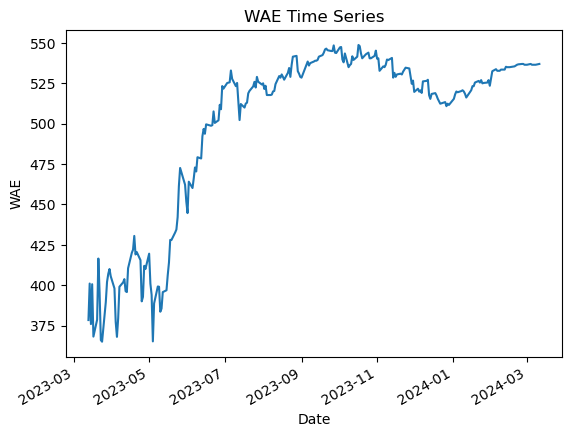

In [17]:
dataframes['mar20_2024']['WAE'].plot()
plt.xlabel('Date')
plt.ylabel('WAE')
plt.title('WAE Time Series')
plt.show()


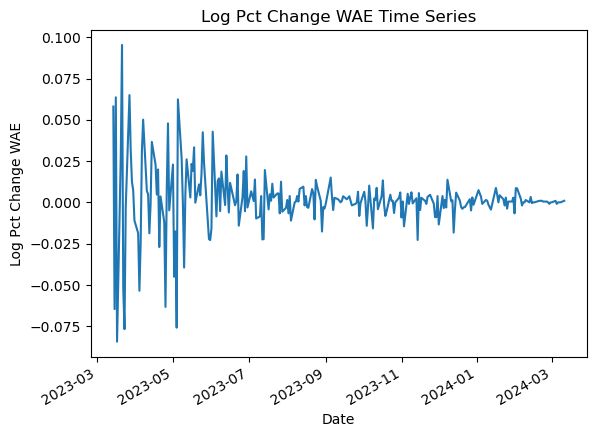

In [18]:
dataframes['mar20_2024']['Log_Pct_Change_WAE'].plot()
plt.xlabel('Date')
plt.ylabel('Log Pct Change WAE')
plt.title('Log Pct Change WAE Time Series')
plt.show()


